# Clustering of outfield football players using Hierarchical, Agglomerative, KMeans, DBSCAN and Affinity Propagation clustering techniques

# Import required libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.feature_extraction.text import CountVectorizer
from collections import Iterable
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import  PCA
from sklearn.cluster import AgglomerativeClustering,KMeans, DBSCAN, AffinityPropagation
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
from itertools import product
from scipy.cluster import hierarchy
from yellowbrick.cluster import KElbowVisualizer
import warnings



warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the data into a dataframe

In [2]:
df = pd.read_csv('players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [4]:
# getting number of rows and columns
df.shape

(18278, 104)

In [5]:
# show stats for numrical columns
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [6]:
# show all columns
df.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'mo

In [7]:
# columns to drop
to_drop = ['sofifa_id', 'player_url','long_name', 'dob', 'nationality',  'wage_eur', 'real_face',
          'release_clause_eur', 'team_position', 'team_jersey_number', 'loaned_from','joined',
          'contract_valid_until', 'nation_position','nation_jersey_number', 'club', 'body_type',
          'player_tags', 'player_traits','gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning']

In [8]:
# drop unrequired libraries
df = df.drop(to_drop, axis='columns')

# Data Preprocessing

In [9]:
def clean(x):
    try:
        x = x.split('+')
        return x[0]
    except Exception:
        pass

In [10]:
# clean object columns with '+' sign
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(clean)

In [11]:
# method to clean player positions
def clean_position(x):
    x = x.split(',')
    return x[0]

In [12]:
# keep most preffered position
df['player_positions']= df['player_positions'].apply(clean_position)

In [13]:
df.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,94,94,95500000,RW,Left,5,...,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,34,187,83,93,93,58500000,ST,Right,5,...,65,61,61,61,65,61,53,53,53,61
2,Neymar Jr,27,175,68,92,92,105500000,LW,Right,5,...,66,61,61,61,66,61,46,46,46,61
3,J. Oblak,26,188,87,91,93,77500000,GK,Right,3,...,None,None,None,None,None,None,None,None,None,None
4,E. Hazard,28,175,74,91,91,90000000,LW,Right,4,...,66,63,63,63,66,61,49,49,49,61


In [14]:
df.shape

(18278, 79)

In [15]:
# retain players with an overall score above 85
df = df[((df['overall'] > 85) & (df['player_positions'] != 'GK'))]
df.shape

(62, 79)

In [16]:
# rest data frame index
df.reset_index(drop=True, inplace=True)

In [17]:
# number of players in current dataframe (with above 85 overall)
len(df)

62

In [18]:
df.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,94,94,95500000,RW,Left,5,...,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,34,187,83,93,93,58500000,ST,Right,5,...,65,61,61,61,65,61,53,53,53,61
2,Neymar Jr,27,175,68,92,92,105500000,LW,Right,5,...,66,61,61,61,66,61,46,46,46,61
3,E. Hazard,28,175,74,91,91,90000000,LW,Right,4,...,66,63,63,63,66,61,49,49,49,61
4,K. De Bruyne,28,181,70,91,91,90000000,CAM,Right,4,...,77,77,77,77,77,73,66,66,66,73


In [19]:
# change data type of possible numerical columns to numerical
df = df.apply(pd.to_numeric, errors = 'ignore', downcast = 'float')

In [20]:
# dislay dataframe with object (or string) type
df.select_dtypes(include='object').head(4)

,short_name,player_positions,preferred_foot,work_rate
0,L. Messi,RW,Left,Medium/Low
1,Cristiano Ronaldo,ST,Right,High/Low
2,Neymar Jr,LW,Right,High/Medium
3,E. Hazard,LW,Right,High/Medium


In [21]:
# a list of all columns with object datatype
obj_cols = list(df.select_dtypes(include='object').columns[1:])
obj_cols

['player_positions', 'preferred_foot', 'work_rate']

In [22]:
# check if any columns have  missing values
df.columns[df.isna().any()]

Index([], dtype='object')

In [23]:
# seperate the name columns from others
# copy other columns to a new dataframe
name = df['short_name']
tdf = df.drop(['short_name'], axis='columns')

In [24]:
len(tdf)

62

In [25]:
tdf.head()

,age,height_cm,weight_kg,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,weak_foot,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32.0,170.0,72.0,94.0,94.0,95500000.0,RW,Left,5.0,4.0,...,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0
1,34.0,187.0,83.0,93.0,93.0,58500000.0,ST,Right,5.0,4.0,...,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0
2,27.0,175.0,68.0,92.0,92.0,105500000.0,LW,Right,5.0,5.0,...,66.0,61.0,61.0,61.0,66.0,61.0,46.0,46.0,46.0,61.0
3,28.0,175.0,74.0,91.0,91.0,90000000.0,LW,Right,4.0,4.0,...,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
4,28.0,181.0,70.0,91.0,91.0,90000000.0,CAM,Right,4.0,5.0,...,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0


In [26]:
# apply label encoding to categorical columns
le = LabelEncoder()
for col in  obj_cols:
    tdf[col] = le.fit_transform(tdf[col])

In [27]:
tdf.head()

,age,height_cm,weight_kg,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,weak_foot,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32.0,170.0,72.0,94.0,94.0,95500000.0,8,0,5.0,4.0,...,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0
1,34.0,187.0,83.0,93.0,93.0,58500000.0,9,1,5.0,4.0,...,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0
2,27.0,175.0,68.0,92.0,92.0,105500000.0,6,1,5.0,5.0,...,66.0,61.0,61.0,61.0,66.0,61.0,46.0,46.0,46.0,61.0
3,28.0,175.0,74.0,91.0,91.0,90000000.0,6,1,4.0,4.0,...,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
4,28.0,181.0,70.0,91.0,91.0,90000000.0,0,1,4.0,5.0,...,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0


In [28]:
# normalise the values in each column 
scaler = MinMaxScaler()
for col in tdf.columns:
    tdf[col] = scaler.fit_transform(tdf[[col]])

In [29]:
tdf.head()

,age,height_cm,weight_kg,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,weak_foot,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,0.857143,0.225807,0.371429,1.000,0.888889,0.885057,0.888889,0.0,1.00,0.666667,...,0.32,0.300000,0.300000,0.300000,0.32,0.250000,0.186046,0.186046,0.186046,0.250000
1,1.000000,0.774194,0.685714,0.875,0.777778,0.459770,1.000000,1.0,1.00,0.666667,...,0.20,0.133333,0.133333,0.133333,0.20,0.178571,0.209302,0.209302,0.209302,0.178571
2,0.500000,0.387097,0.257143,0.750,0.666667,1.000000,0.666667,1.0,1.00,1.000000,...,0.24,0.133333,0.133333,0.133333,0.24,0.178571,0.046512,0.046512,0.046512,0.178571
3,0.571429,0.387097,0.428571,0.625,0.555556,0.821839,0.666667,1.0,0.75,0.666667,...,0.24,0.200000,0.200000,0.200000,0.24,0.178571,0.116279,0.116279,0.116279,0.178571
4,0.571429,0.580645,0.314286,0.625,0.555556,0.821839,0.000000,1.0,0.75,1.000000,...,0.68,0.666667,0.666667,0.666667,0.68,0.607143,0.511628,0.511628,0.511628,0.607143


# Dimensionality reduction

In [31]:
# reduce the columns to 2 

pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(tdf))

# Hierarchical clustering using agglomerative clustering

In [32]:
# create a distance matrix
dist_matrix = euclidean_distances(reduced, reduced)
dist_matrix

array([[0.        , 1.18875306, 0.55200807, ..., 2.11442502, 2.87022928,
        1.80122216],
       [1.18875306, 0.        , 0.70391419, ..., 1.6946003 , 1.76978539,
        0.82201109],
       [0.55200807, 0.70391419, 0.        , ..., 2.03790397, 2.46257734,
        1.44686371],
       ...,
       [2.11442502, 1.6946003 , 2.03790397, ..., 0.        , 1.69974119,
        1.10767554],
       [2.87022928, 1.76978539, 2.46257734, ..., 1.69974119, 0.        ,
        1.08320666],
       [1.80122216, 0.82201109, 1.44686371, ..., 1.10767554, 1.08320666,
        0.        ]])

In [33]:
# performs hierarchicaL clustering
Z = hierarchy.linkage(dist_matrix, 'complete')

In [34]:
# create labels for dendrogram leaves
def leaf_label(id):
    return '[%s]' % (df['short_name'][id])

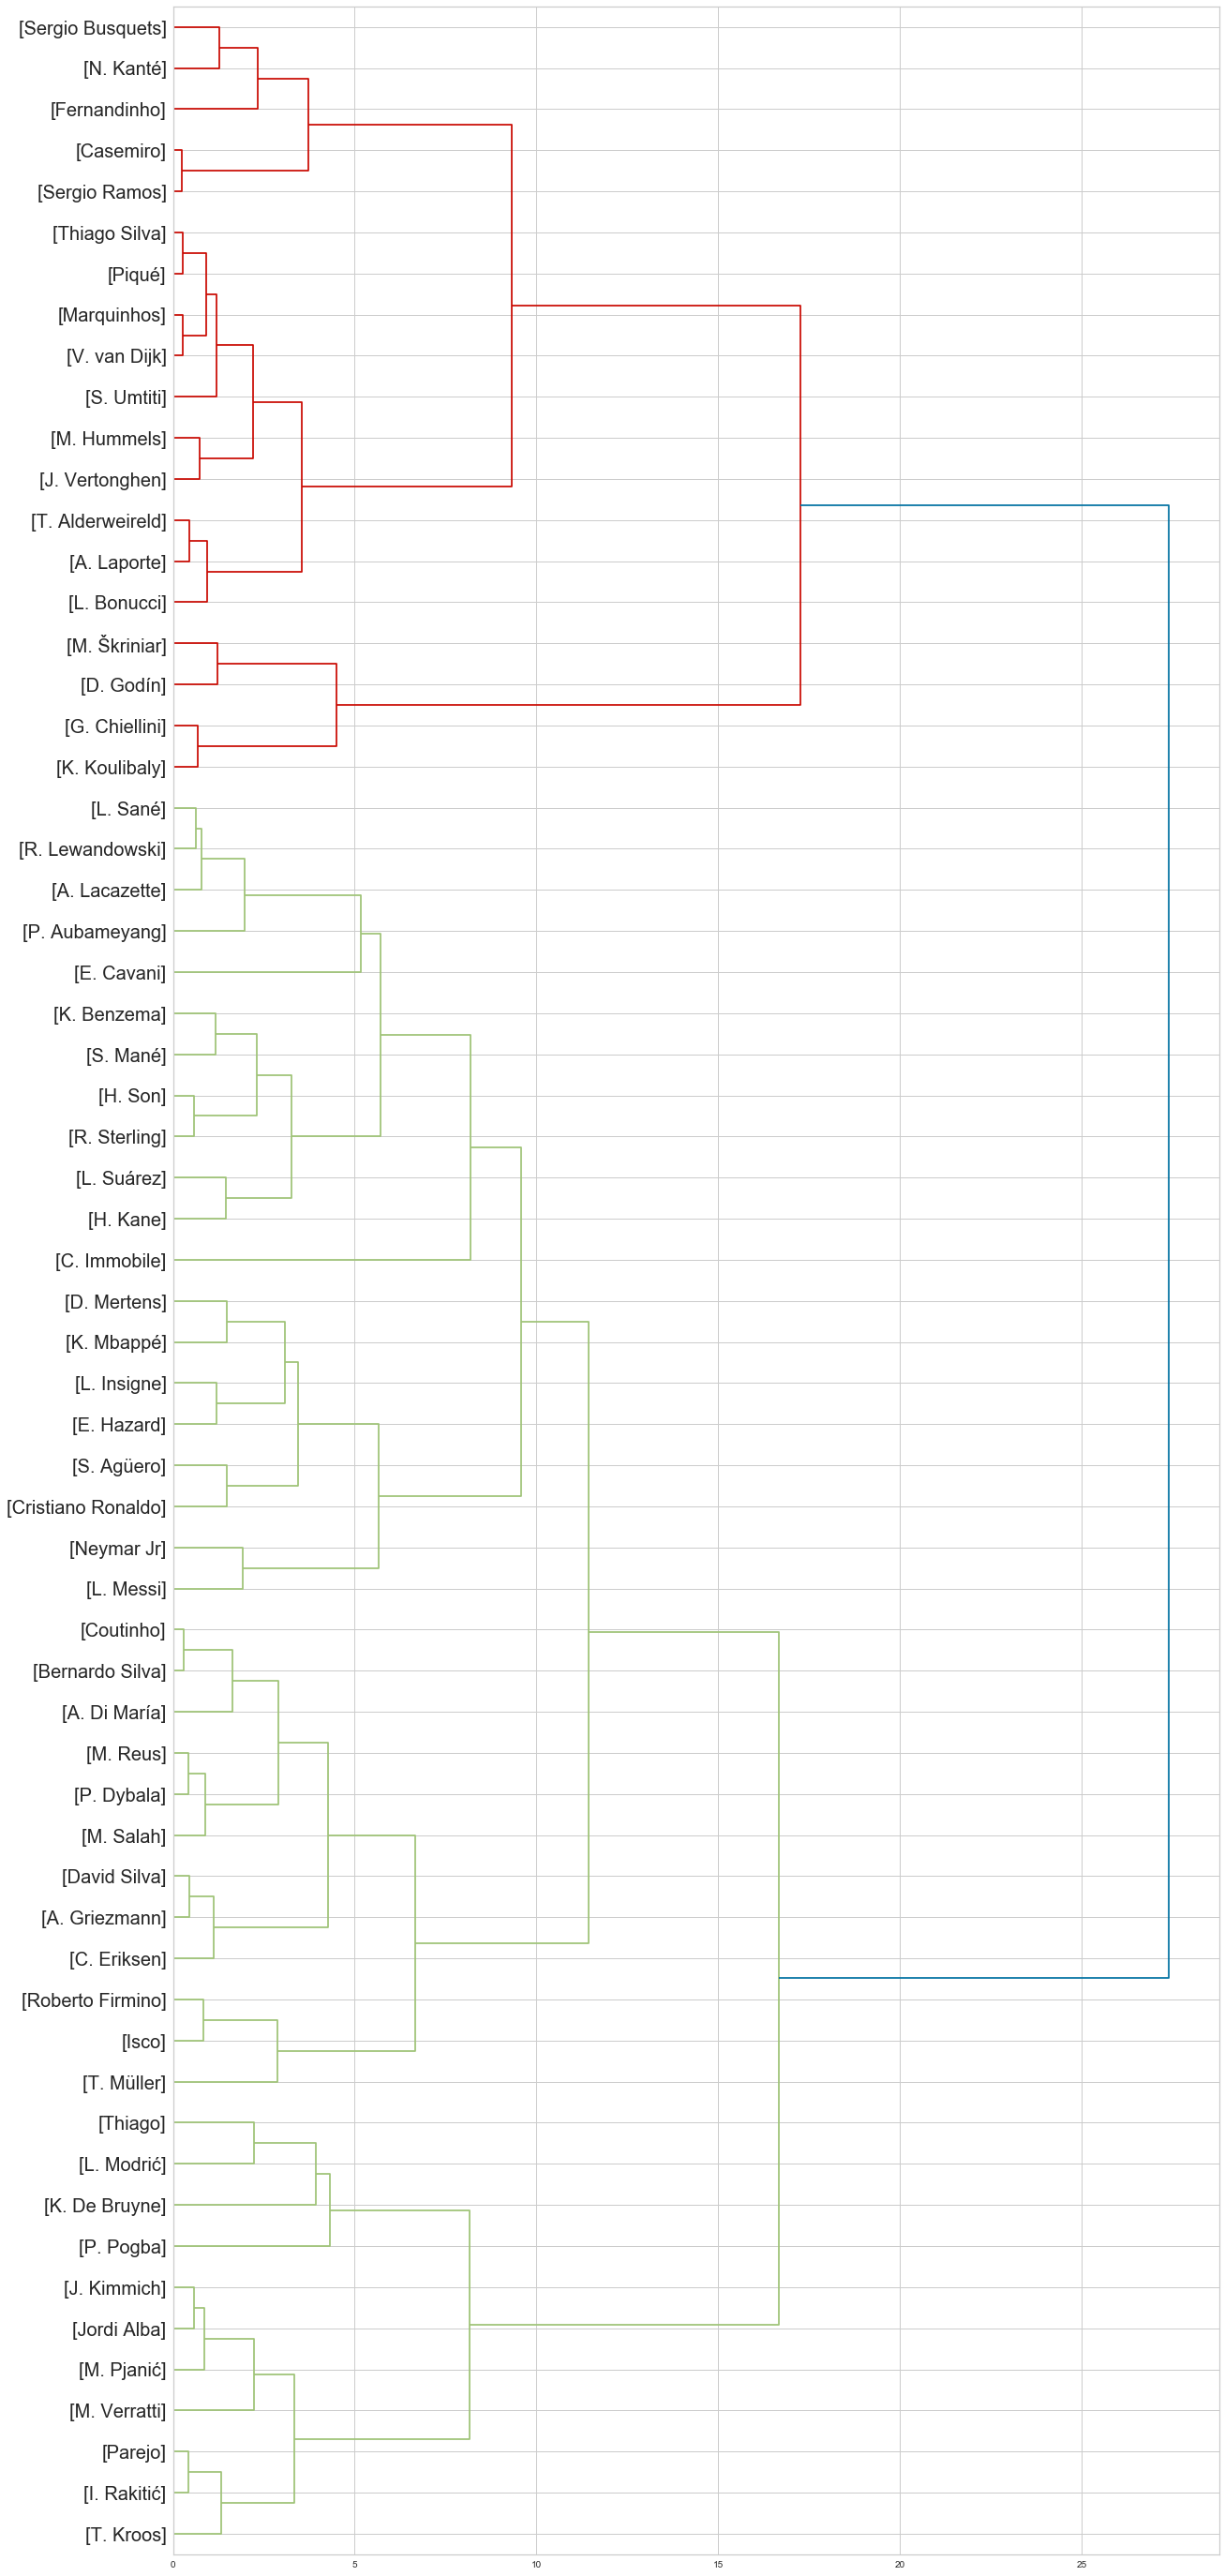

In [35]:
# show dendrogram
plt.figure(figsize= (20,50))
dendrogrm = hierarchy.dendrogram(Z, leaf_label_func=leaf_label, leaf_rotation=0, 
                                 leaf_font_size=20, orientation='right' )

This shows  2 to 5 clusters within the data.
we should calculate silhouette scores to determine a more accurate clustering

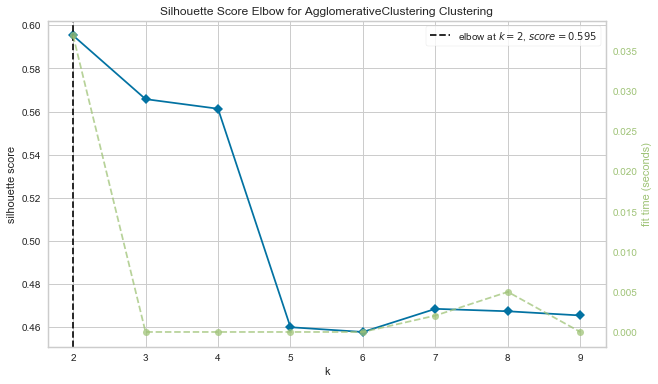

In [36]:
# plot silhouette scores for different values of clusters
plt.figure(figsize=(10,6))
agglom  = AgglomerativeClustering(linkage='complete')
visualizer = KElbowVisualizer(agglom, k=(2, 10), metric = 'silhouette')
visualizer.fit(dist_matrix)
visualizer.show()

In [37]:
# define clustering object and fit data
agglom = AgglomerativeClustering(n_clusters=2, linkage= 'complete')
agglom.fit(dist_matrix)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)

In [38]:
# add new labels  to data frame
reduced['aggl_cluster'] = agglom.labels_
reduced['name'] = name
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced = reduced[['name', 'x', 'y', , 'aggl_cluster']]
reduced.head()

,name,cluster,x,y
0,L. Messi,1,-2.379094,-0.615692
1,Cristiano Ronaldo,1,-2.134220,0.547567
2,Neymar Jr,1,-2.469828,-0.071192
3,E. Hazard,1,-2.140464,-0.054739
4,K. De Bruyne,1,-0.801797,-1.211609


In [39]:
# show sizes per cluster
ag_cluster_size = reduced.groupby('cluster').size().to_frame()
ag_cluster_size.columns= ['ag_cluster']
ag_cluster_size

,ag_cluster
cluster,
0,19
1,43


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'PC2')

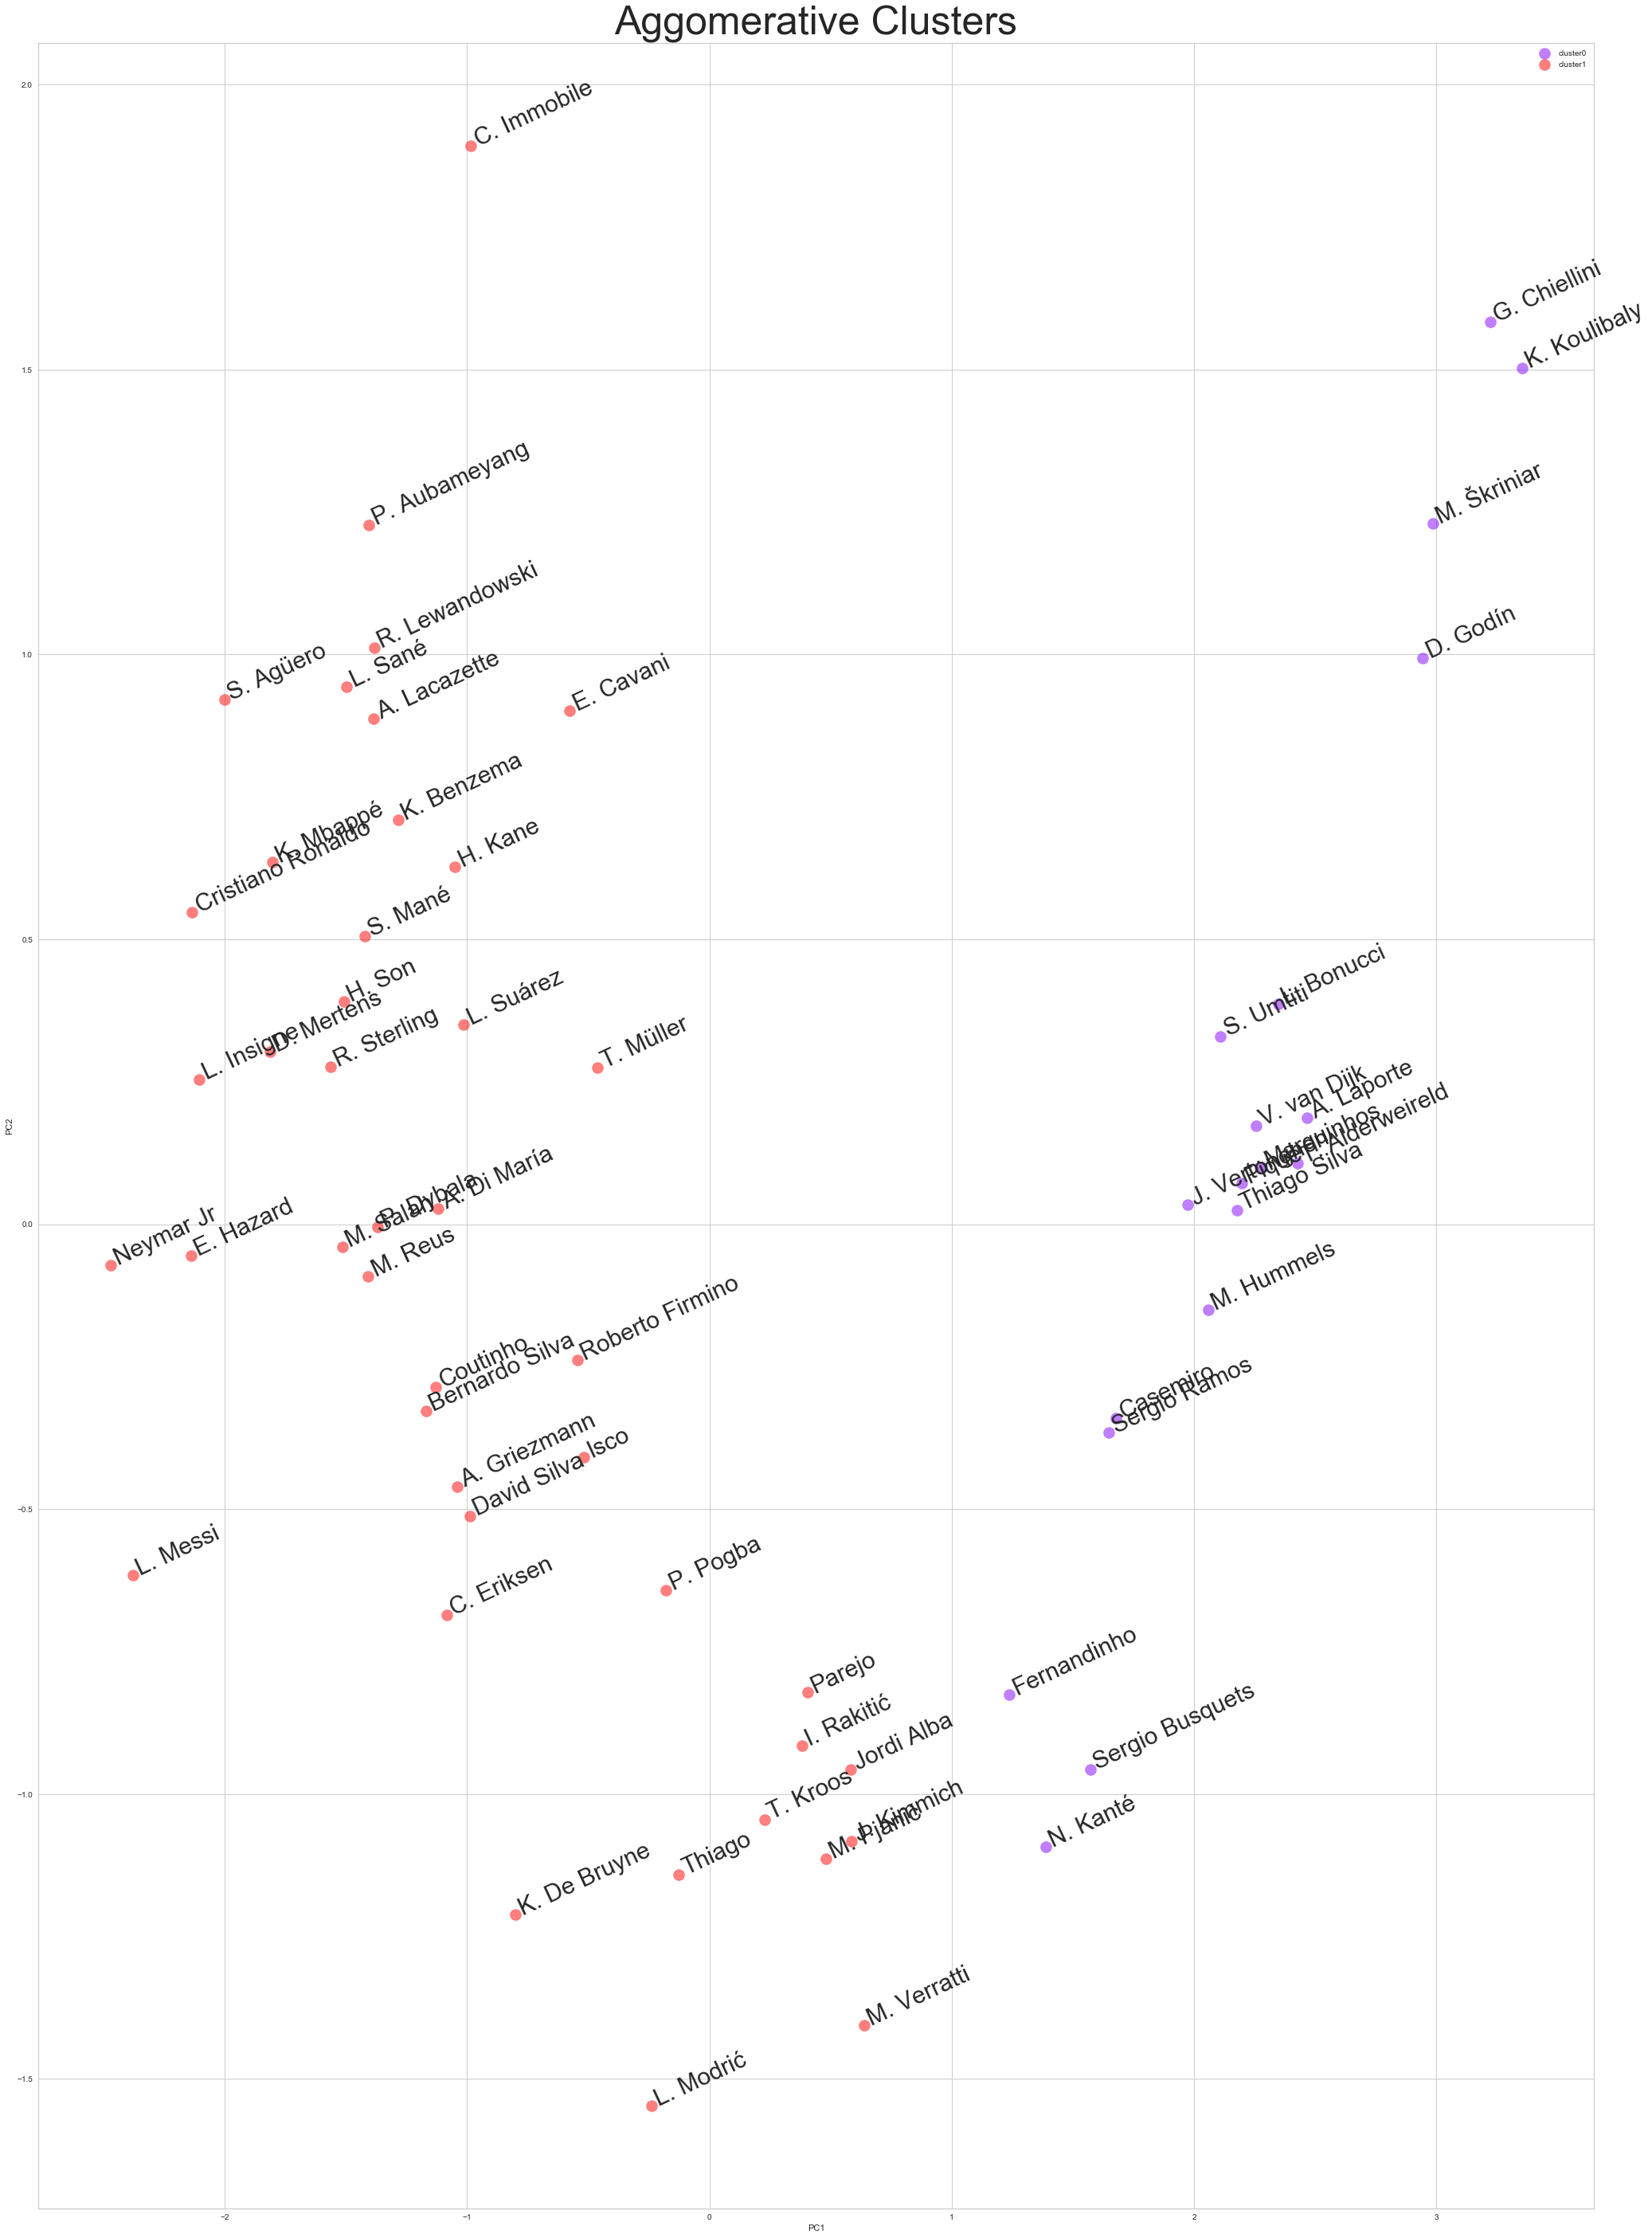

In [40]:
#plot the scatter plot of labels
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure.
plt.figure(figsize=(35,50))

for color, label in zip(colors, cluster_labels):
    subset = reduced[reduced.cluster == label]
    for i in subset.index:
            plt.text(subset.x[i], subset.y[i],str(subset['name'][i]), rotation=25, fontsize=30) 
    plt.scatter(subset.x, subset.y, s=200, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.x, subset.y)
plt.legend()
plt.title('Aggomerative Clusters', fontsize=50)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Using Kmeans clustering

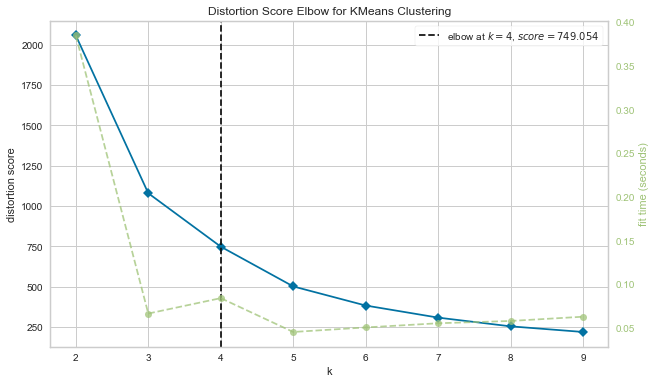

In [41]:
# use elbow method to choose k values
plt.figure(figsize=(10,6))
km  = KMeans()
visualizer = KElbowVisualizer(km, k=(2, 10))
visualizer.fit(dist_matrix)
visualizer.show()

In [42]:
# define kmeans with 4 clusters
km = KMeans(n_clusters=4)
km.fit(dist_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
# add labels to dataframe
reduced['km_cluster'] = km.labels_
reduced.head()

,name,cluster,x,y,km_cluster
0,L. Messi,1,-2.379094,-0.615692,1
1,Cristiano Ronaldo,1,-2.134220,0.547567,1
2,Neymar Jr,1,-2.469828,-0.071192,1
3,E. Hazard,1,-2.140464,-0.054739,1
4,K. De Bruyne,1,-0.801797,-1.211609,0


In [44]:
# show cluster sizes
km_cluster_size = reduced.groupby('km_cluster').size().to_frame()
km_cluster_size.columns= ['km_cluster']
km_cluster_size

,km_cluster
km_cluster,
0,13
1,30
2,15
3,4


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'PC2')

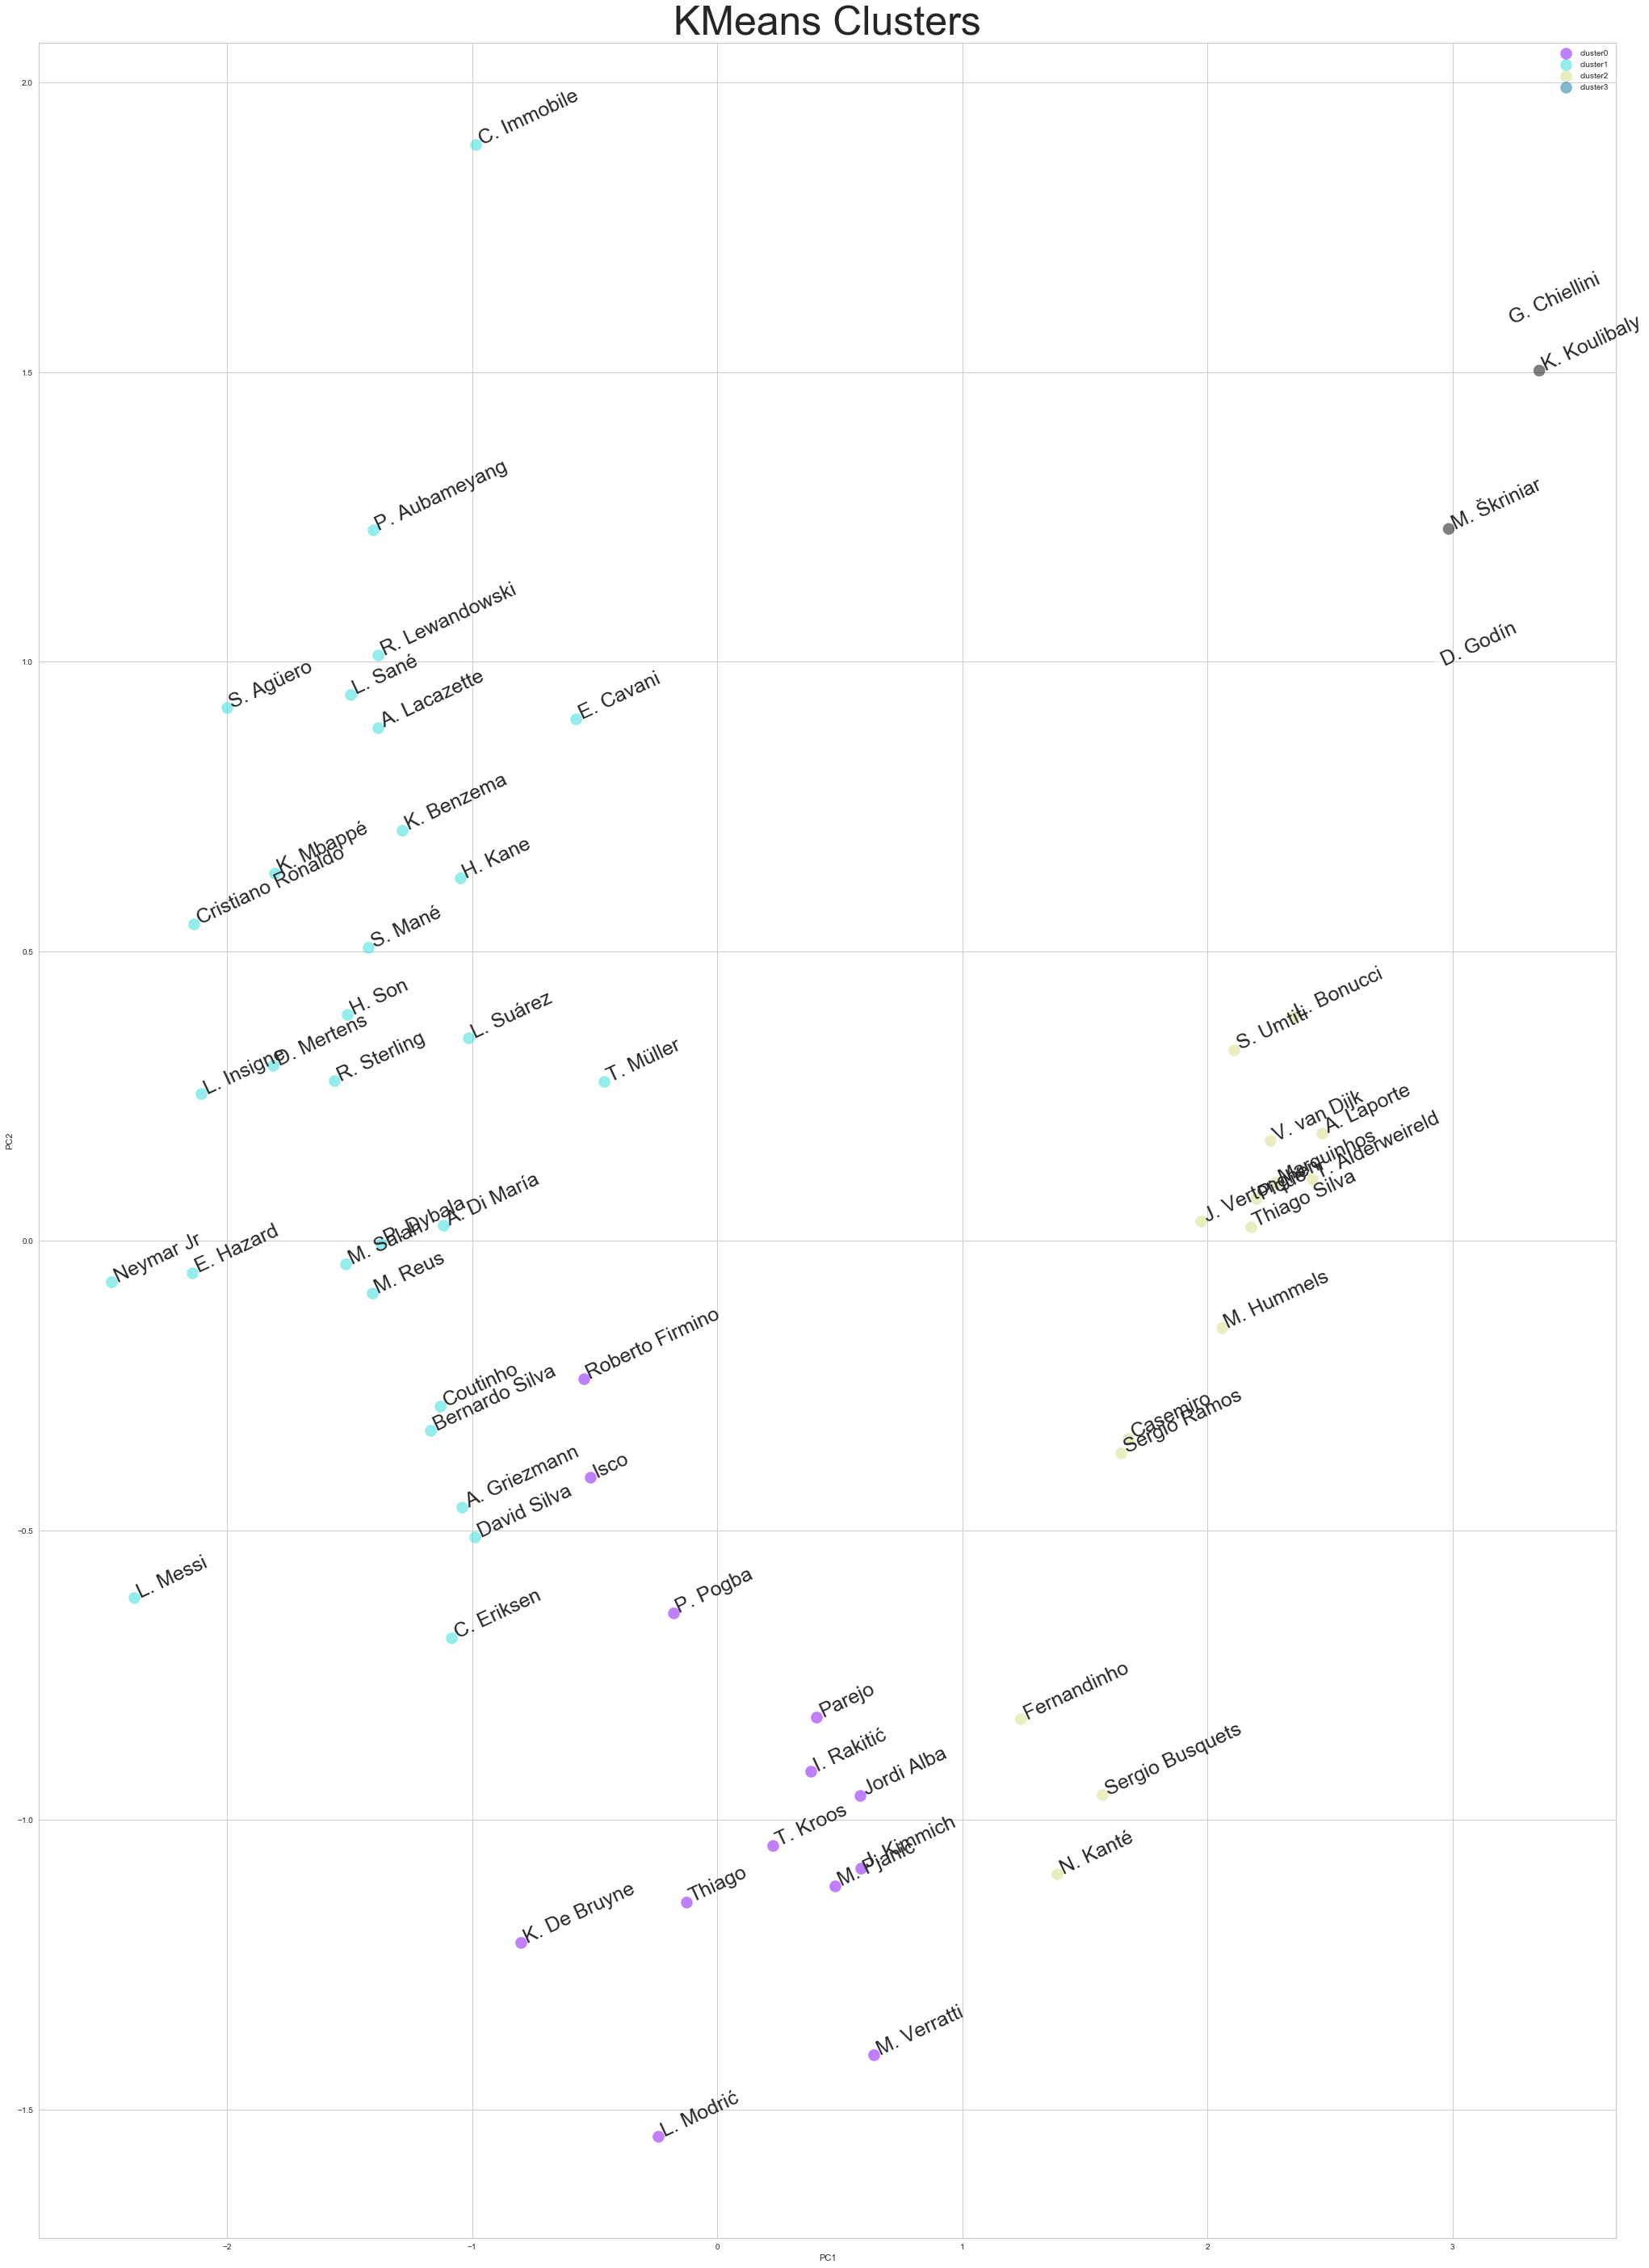

In [45]:
# plot scaterplot of labels
n_clusters = max(km.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure.
plt.figure(figsize=(35,50))

for color, label in zip(colors, cluster_labels):
    subset = reduced[reduced.km_cluster == label]
    for i in subset.index:
            plt.text(subset.x[i], subset.y[i],str(subset['name'][i]), rotation=25, fontsize=25) 
    plt.scatter(subset.x, subset.y, s=200, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.x, subset.y)
plt.legend()
plt.title('KMeans Clusters', fontsize=50)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Using DBSCAN

In [46]:
# iterating to determine best parameters
eps = np.arange(0.1, 1, 0.05)
min_samples = np.arange(3, 7)
db_params = list(product(eps, min_samples))
sil_score = []
num_clusters =[]
dbscan_params = []

for params in db_params:
    db_scan  = DBSCAN(eps=params[0], min_samples=params[1])
    db_scan.fit(reduced[['x','y']])
    num_labels = len(np.unique(db_scan.labels_))
    if num_labels != 1:
        dbscan_params.append(params)
        num_clusters.append(num_labels)
        score = silhouette_score(reduced[['x','y']], db_scan.labels_)
        sil_score.append(score)

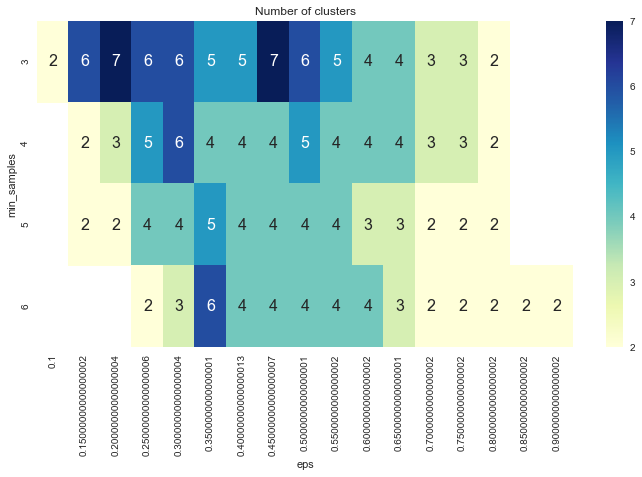

In [47]:
# plot heatmap number of clusters  per parameter
tmp = pd.DataFrame.from_records(dbscan_params, columns =['eps', 'min_samples'])   
tmp['No_of_clusters'] = num_clusters

pivot = pd.pivot_table(tmp, values='No_of_clusters', index='min_samples', columns='eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

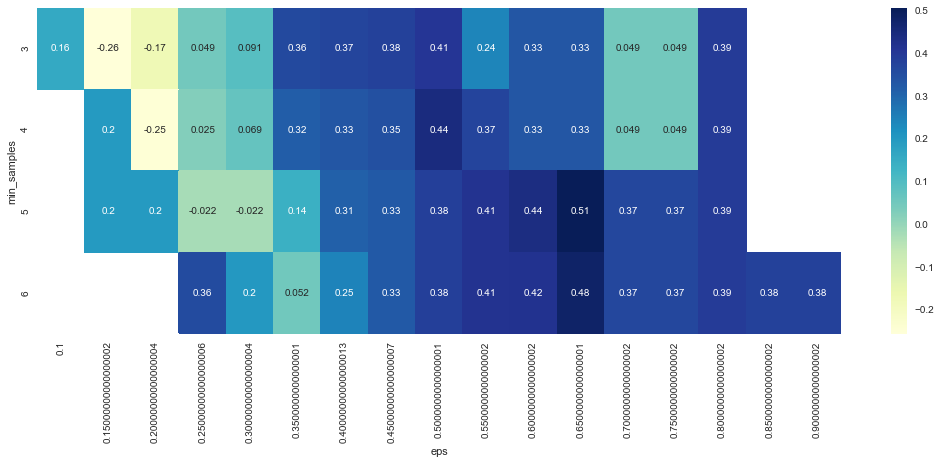

In [48]:
# plot heatmap of silhouette score per parameter
tmp = pd.DataFrame.from_records(dbscan_params, columns =['eps', 'min_samples'])   
tmp['Sil_score'] = sil_score

pivot = pd.pivot_table(tmp, values='Sil_score', index='min_samples', columns='eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [49]:
# use best parameters to fit data
dbscan = DBSCAN(eps=0.65, min_samples=5)
dbscan.fit(reduced[['x','y']])

DBSCAN(algorithm='auto', eps=0.65, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [50]:
# add labels to dataframe
reduced['dbscan_cluster'] = dbscan.labels_
reduced.head()

,name,cluster,x,y,km_cluster,dbscan_cluster
0,L. Messi,1,-2.379094,-0.615692,1,0
1,Cristiano Ronaldo,1,-2.134220,0.547567,1,0
2,Neymar Jr,1,-2.469828,-0.071192,1,0
3,E. Hazard,1,-2.140464,-0.054739,1,0
4,K. De Bruyne,1,-0.801797,-1.211609,0,0


In [51]:
# show cluster sizes
dbscan_cluster_size = reduced.groupby('dbscan_cluster').size().to_frame()
dbscan_cluster_size.columns= ['dbscan_cluster']
dbscan_cluster_size

,dbscan_cluster
dbscan_cluster,
-1,5
0,42
1,15


In [ ]:
# show outliers
reduced[reduced['dbscan_cluster']==-1]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'PC2')

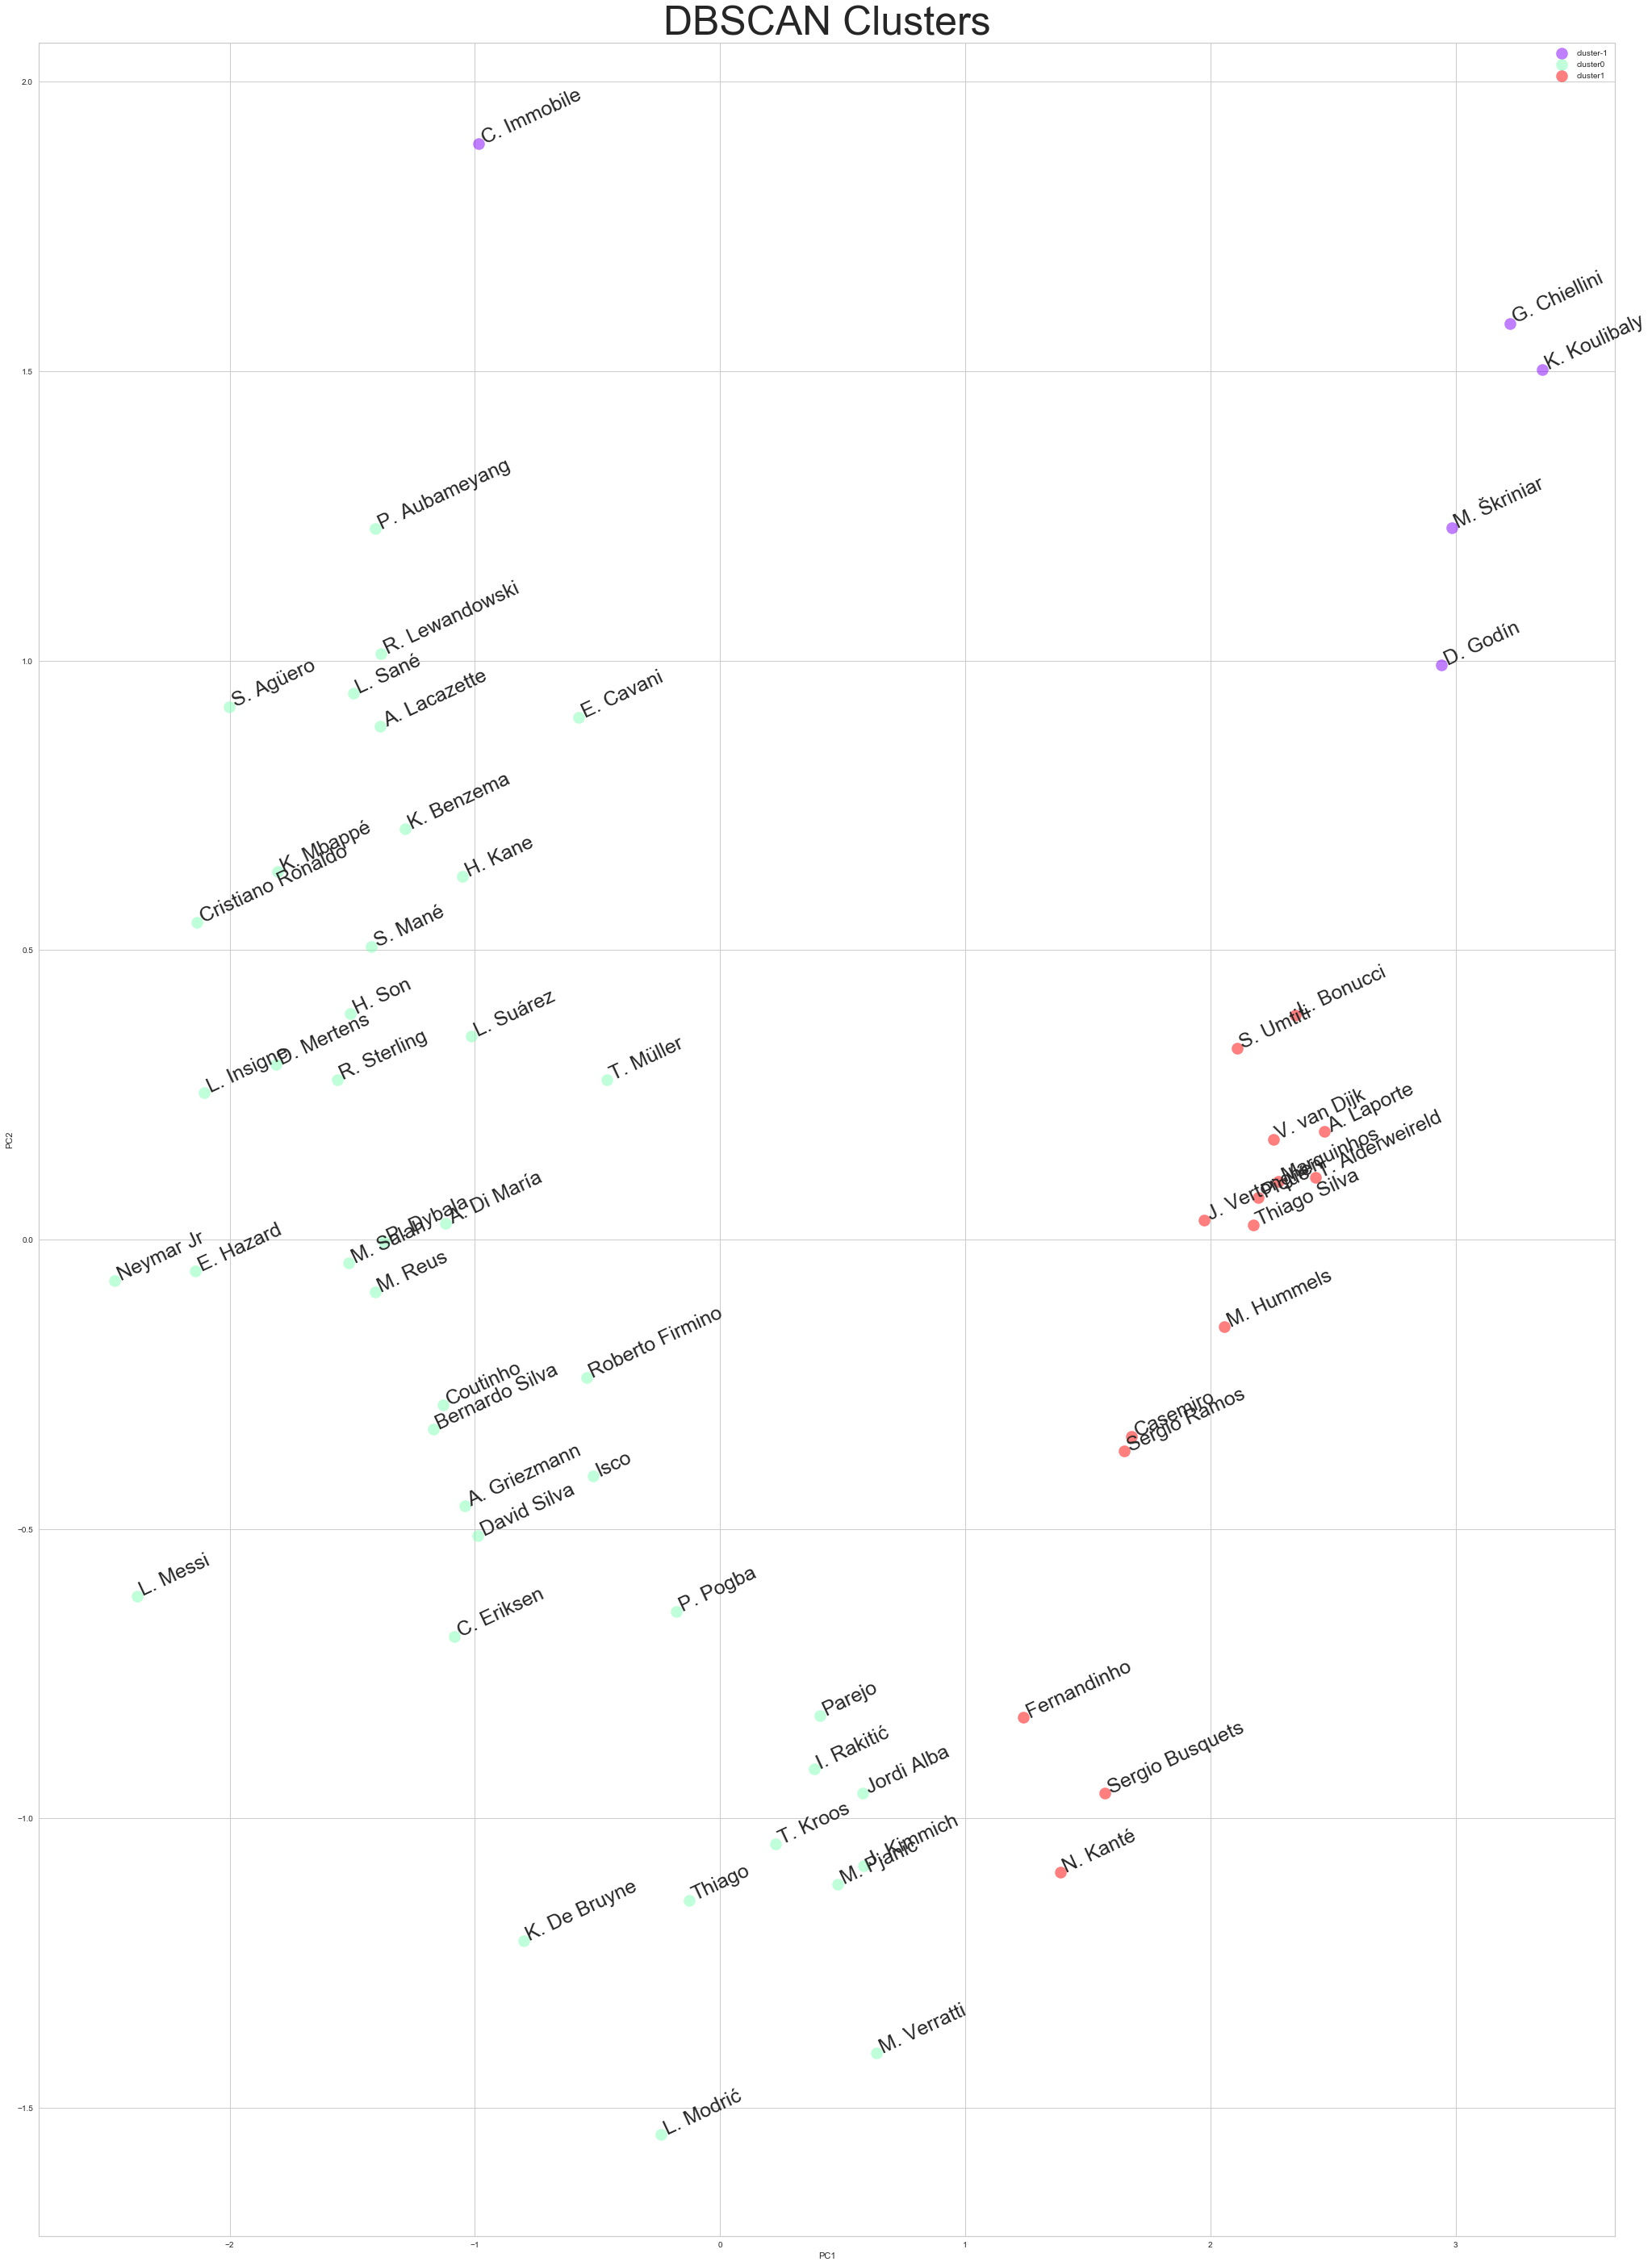

In [52]:
# plot scatter plot of labels 
n_clusters = len(np.unique(dbscan.labels_))
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(min(dbscan.labels_), n_clusters))

# Create a figure.
plt.figure(figsize=(35,50))

for color, label in zip(colors, cluster_labels):
    subset = reduced[reduced.dbscan_cluster == label]
    for i in subset.index:
            plt.text(subset.x[i], subset.y[i],str(subset['name'][i]), rotation=25, fontsize=25) 
    plt.scatter(subset.x, subset.y, s=200, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.x, subset.y)
plt.legend()
plt.title('DBSCAN Clusters', fontsize=50)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Clustering with Affinity Propagation

In [87]:
# iterate to choose best parameters
num_clusters = []
preferences = range(-100, 0, 10)
sil_score = []
af_preferences = []
for value in preferences:
    af_prop = AffinityPropagation(preference = value)
    af_prop.fit(reduced[['x', 'y']])
    num_labels = len(np.unique(af_prop.labels_))
    if num_labels != 1:
        af_preferences.append(value)
        num_clusters.append(num_labels)
        score = silhouette_score(reduced[['x', 'y']], af_prop.labels_)
        sil_score.append(score)

In [88]:
# show parameter with best score
af_result = pd.DataFrame([af_preferences, num_clusters, sil_score], 
                         index = ['preferences', 'num_clusters', 'sil_score']).T

af_result.head(4)

,preferences,num_clusters,sil_score
0,-100.0,2.0,0.570821
1,-90.0,2.0,0.563720
2,-80.0,2.0,0.572537
3,-70.0,2.0,0.563720


In [91]:
# show parameter with best score
af_result.sort_values(by='sil_score', ascending=False).head()

,preferences,num_clusters,sil_score
2,-80.0,2.0,0.572537
0,-100.0,2.0,0.570821
5,-50.0,2.0,0.570821
1,-90.0,2.0,0.563720
3,-70.0,2.0,0.563720


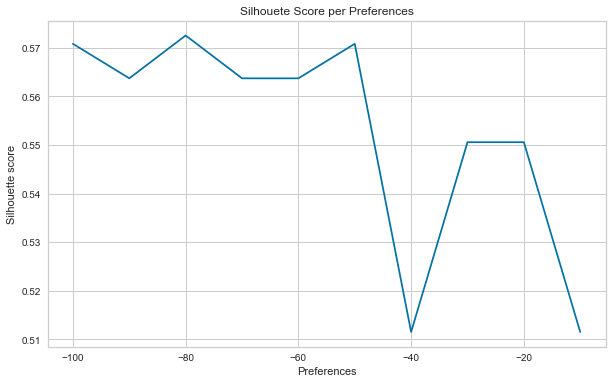

In [95]:
# plot silhouette score per preference
plt.figure(figsize= (10,6))

sns.lineplot( x='preferences', y='sil_score',data  = af_result)
plt.xlabel('Preferences')
plt.ylabel('Silhouette score')
plt.title('Silhouete Score per Preferences')

plt.show()

In [96]:
# define affinity propagation with best parameters
af_prop = AffinityPropagation(preference = -80)
af_prop.fit(reduced[['x', 'y']])

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=-80, verbose=False)

In [97]:
# add labels to dataframe
reduced['af_prop_cluster'] = af_prop.labels_
reduced.head()

,name,cluster,x,y,km_cluster,dbscan_cluster,af_prop_cluster
0,L. Messi,1,-2.379094,-0.615692,1,0,0
1,Cristiano Ronaldo,1,-2.134220,0.547567,1,0,0
2,Neymar Jr,1,-2.469828,-0.071192,1,0,0
3,E. Hazard,1,-2.140464,-0.054739,1,0,0
4,K. De Bruyne,1,-0.801797,-1.211609,0,0,0


In [98]:
# show cluster sizes
af_prop_cluster_size = reduced.groupby('af_prop_cluster').size().to_frame()
af_prop_cluster_size.columns= ['af_prop_cluster']
af_prop_cluster_size

,af_prop_cluster
af_prop_cluster,
0,36
1,26


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'PC2')

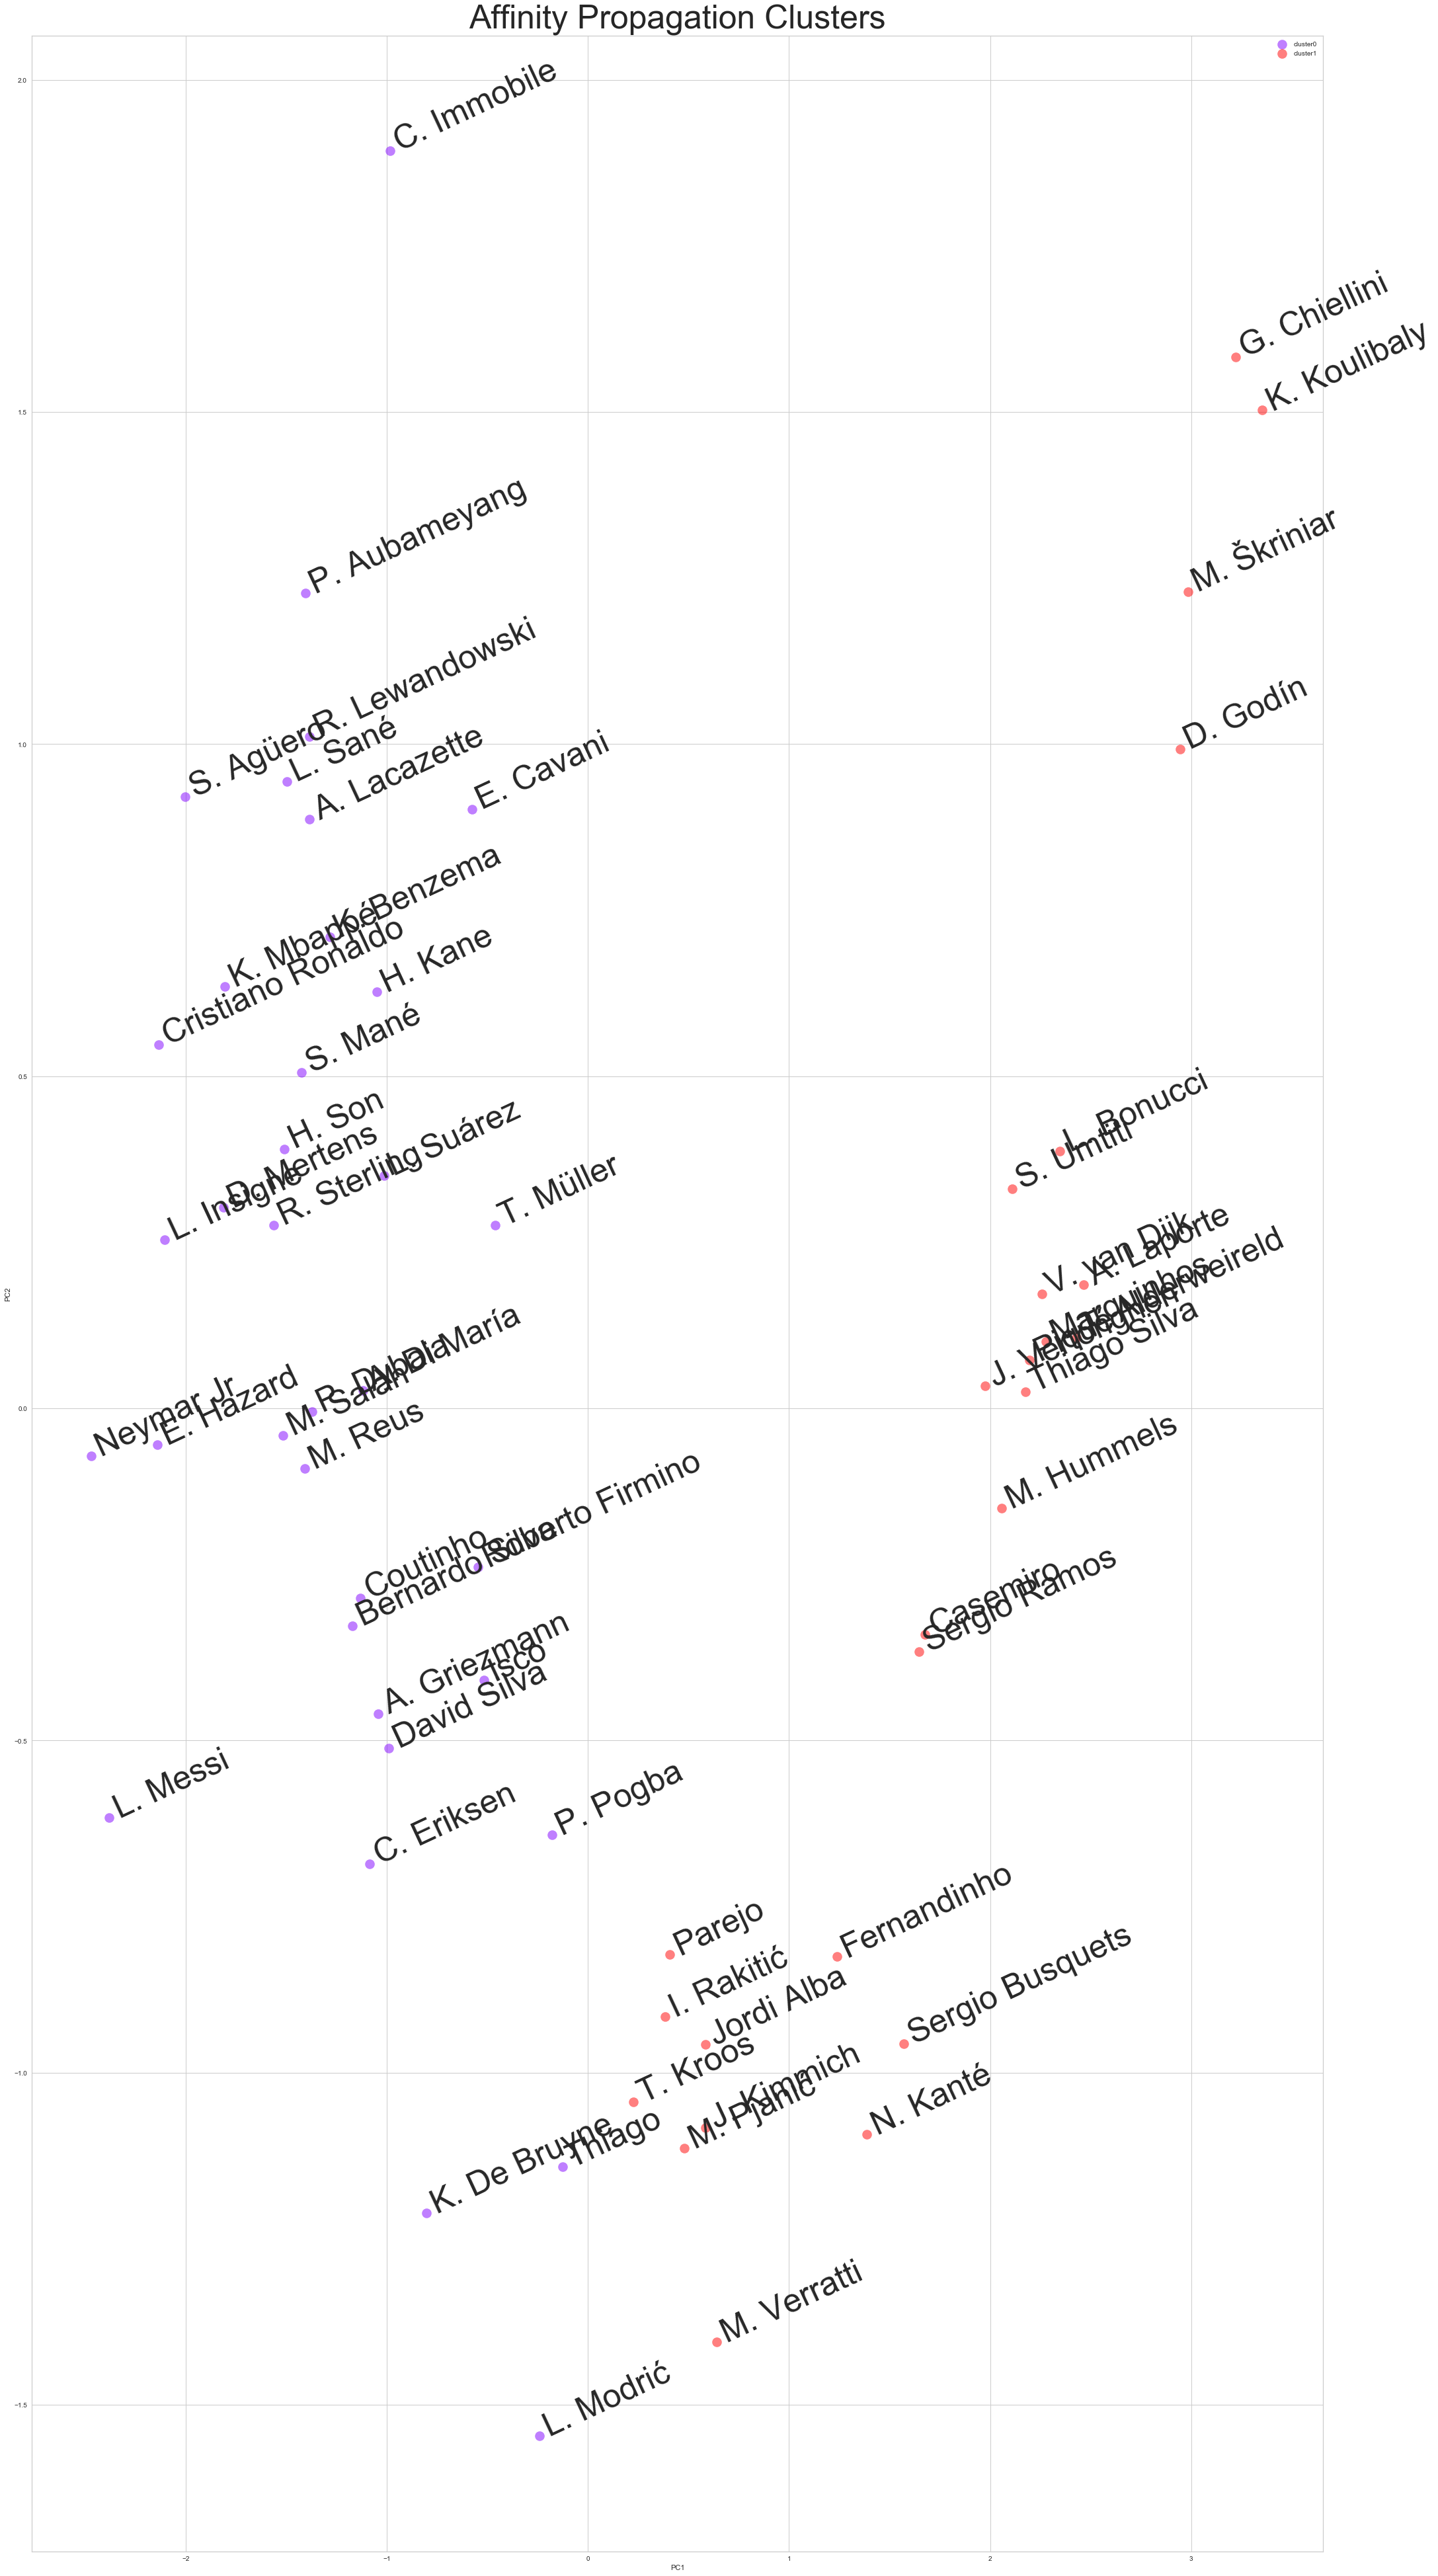

In [100]:
# plot  scatterplots of labels
n_clusters = len(np.unique(af_prop.labels_))
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(min(af_prop.labels_), n_clusters))

# Create a figure.
plt.figure(figsize=(35,70))

for color, label in zip(colors, cluster_labels):
    subset = reduced[reduced.af_prop_cluster == label]
    for i in subset.index:
            plt.text(subset.x[i], subset.y[i],str(subset['name'][i]), rotation=25, fontsize=50) 
    plt.scatter(subset.x, subset.y, s=200, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.x, subset.y)
plt.legend()
plt.title('Affinity Propagation Clusters', fontsize=50)
plt.xlabel('PC1')
plt.ylabel('PC2')